In [2]:
from keras.datasets import reuters
import numpy as np
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [5]:
test_data.shape, test_labels.shape

((2246,), (2246,))

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
def decoded_sequence(sequences, features=10000):
    result = np.zeros((len(sequences), features))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [8]:
x_train = decoded_sequence(train_data)
x_test = decoded_sequence(test_data)

In [9]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [10]:
y_train = np.asarray(to_categorical(train_labels))
y_test = np.asarray(to_categorical(test_labels))

In [11]:
partial_val_x = x_train[:1000]
partial_val_y = y_train[:1000]
partial_train_x = x_train[1000:]
partial_train_y = y_train[1000:]

In [12]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(partial_train_x, partial_train_y, validation_data=(partial_val_x, partial_val_y), epochs=20)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 988us/step - loss: 1.3590 - acc: 0.7006 - val_loss: 0.9804 - val_acc: 0.7930
Epoch 2/20
7982/7982 [==============================] - 6s 814us/step - loss: 0.6571 - acc: 0.8568 - val_loss: 0.8217 - val_acc: 0.8290
Epoch 3/20
7982/7982 [==============================] - 6s 806us/step - loss: 0.3908 - acc: 0.9131 - val_loss: 0.8533 - val_acc: 0.8330
Epoch 4/20
7982/7982 [==============================] - 6s 789us/step - loss: 0.2800 - acc: 0.9350 - val_loss: 0.8983 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 6s 805us/step - loss: 0.2249 - acc: 0.9478 - val_loss: 1.0063 - val_acc: 0.8250
Epoch 6/20
7982/7982 [==============================] - 6s 809us/step - loss: 0.1991 - acc: 0.9526 - val_loss: 1.0976 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 6s 808us/step - loss: 0.1807 - acc: 0.9525 - val_loss: 1.2107 - val_acc: 0.8030


In [15]:
history.history.keys()

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])

In [16]:
import matplotlib.pyplot as plt

In [17]:
def val_train_acc_plot(x_data):
    plt.plot(x_data, history.history['acc'], 'b', label='acc')
    plt.plot(x_data, history.history['val_acc'], 'r', label='val acc')
    plt.legend()
    plt.title('Training Accuracy / Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc Rate')
    plt.show()

In [18]:
def val_train_loss_plot(x_data):
    plt.plot(x_data, history.history['loss'], 'b', label='loss')
    plt.plot(x_data, history.history['val_loss'], 'r', label='val loss')
    plt.legend()
    plt.title('Training Loss / Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Rate')
    plt.show()

In [19]:
x_data = [i for i in range(1, 21)]

In [20]:
def acc_loss(x_data):
    plt.plot(x_data, history.history['acc'], 'b', label='acc')
    plt.plot(x_data, history.history['loss'], 'r', label='loss')
    plt.legend()
    plt.title('Training Accuracy / Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Rate')
    plt.show()

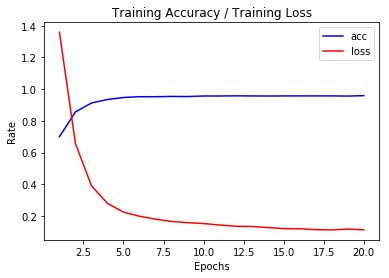

In [21]:
acc_loss(x_data)

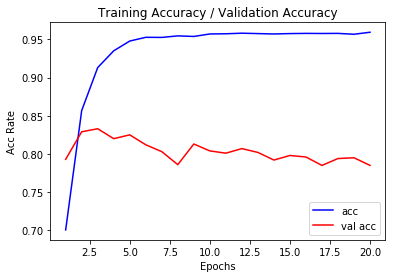

In [22]:
val_train_acc_plot(x_data)

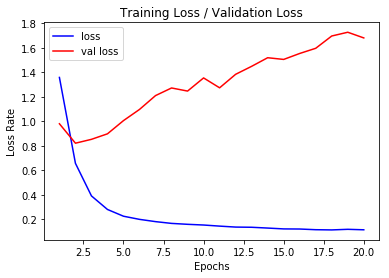

In [23]:
val_train_loss_plot(x_data)

In [24]:
model.evaluate(x_test, y_test, batch_size=128)

2246/2246 [==============================] - 1s 276us/step


[1.9823548876591697, 0.7787177208694941]

In [26]:
predictions = model.predict(x_test)

In [30]:
predictions.shape

(2246, 46)

In [40]:
assert type(predictions[0, :]) == type(predictions[0])

In [34]:
predictions[0].shape

(46,)

In [41]:
np.argmax(predictions[0])

3

In [42]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [43]:
# sparse_categorical_crossentropy 可以对整数进行编码
# categorical_crossentropy可以对one-hot进行编码